# CoralProtect 
An ML model to classify coral reefs as alive or dead

### Importing Libraries and Tools

In [1]:
#Adding Libraries

import os
from PIL import Image

import numpy as np
import pandas as pd

import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import InputLayer, MaxPooling2D, Conv2D, Dropout, Flatten, Dense


from sklearn.preprocessing import LabelBinarizer

C:\Users\magic\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Preparing Dataset for Training

In [2]:
# Reading data by looping every image

classes = [0, 1]

data = []
target = []

for single_class in classes:
    
    images = os.listdir('data/' + str(single_class))
    
    for single_image in images:
        
        file = np.array(Image.open('data/' + str(single_class) + '/' +single_image))
        
        data.append(file)
        target.append(single_class)


In [3]:
len(data), len(target)

(47, 47)

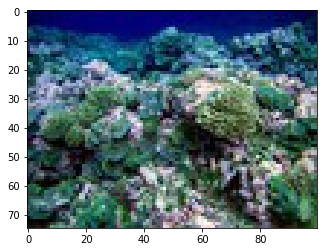

In [4]:
first_image = data[4]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((75,100,-1))
plt.imshow(first_image.astype(np.uint8))
plt.show()

In [6]:
data = np.stack(data)
target = np.stack(target)

In [7]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 75, 100

# the data, split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, target)

x_train = x_train.reshape(-1,img_rows,img_cols,3)
x_test = x_test.reshape(-1,img_rows,img_cols,3)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (35, 75, 100, 3)
35 train samples
12 test samples


### Creating a Keras Model and Adding Layers to Model

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(75, 100, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### Training and testing accuracy on Validation Set

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35 samples, validate on 12 samples
Epoch 1/12
35/35 [==============================] - 2s 65ms/step - loss: 7.8288 - acc: 0.5143 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 2/12
35/35 [==============================] - 1s 25ms/step - loss: 7.8288 - acc: 0.5143 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 3/12
35/35 [==============================] - 1s 25ms/step - loss: 7.8288 - acc: 0.5143 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 4/12
35/35 [==============================] - 1s 25ms/step - loss: 7.8288 - acc: 0.5143 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 5/12
35/35 [==============================] - 1s 24ms/step - loss: 7.8288 - acc: 0.5143 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 6/12
35/35 [==============================] - 1s 25ms/step - loss: 7.8288 - acc: 0.5143 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 7/12
35/35 [==============================] - 1s 25ms/step - loss: 7.8288 - acc: 0.5143 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 8/12
35/35 [=====================

### Predicting Model's accuracy on Physical World

In [11]:
#model.predict()